Start with exploratory sweep

In [5]:
#import
from ema_workbench import Model, MultiprocessingEvaluator, Policy, Scenario

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import pairs_plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim

from ema_workbench.analysis import feature_scoring

In [2]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(4)

    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=3)

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:13<00:00, 22.33it/s]
INFO | experiments finished
INFO | terminating pool


In [3]:
def get_do_nothing_dict():
    return {l.name: 0 for l in model.levers}

policies = [Policy("baseline", **get_do_nothing_dict())]


In [4]:
 with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=policies)

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:04<00:00, 21.19it/s]
INFO | experiments finished
INFO | terminating pool


In [7]:
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Hydrological Resilience Index', 'Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,24,47.131350,1.5,0.614953,164.076969,1.5,0.947611,230.263563,10.0,0.830613,...,0,0,0,0,0,0,0,103,baseline,dikesnet
1,91,52.540085,1.0,0.187830,94.257014,1.0,0.095973,296.381174,10.0,0.395170,...,0,0,0,0,0,0,0,104,baseline,dikesnet
2,14,330.445222,1.0,0.590095,146.747804,1.0,0.704055,340.481383,10.0,0.562102,...,0,0,0,0,0,0,0,105,baseline,dikesnet
3,112,232.117342,1.5,0.458499,63.055955,10.0,0.564303,194.016660,1.5,0.779622,...,0,0,0,0,0,0,0,106,baseline,dikesnet
4,23,134.682247,1.0,0.157211,159.724041,1.5,0.194383,94.682603,10.0,0.624535,...,0,0,0,0,0,0,0,107,baseline,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,127,250.303018,1.5,0.775729,209.547556,10.0,0.442386,221.254415,1.0,0.363339,...,0,0,0,0,0,0,0,198,baseline,dikesnet
96,12,272.485615,1.5,0.821330,164.805033,1.0,0.540934,92.439233,1.5,0.329308,...,0,0,0,0,0,0,0,199,baseline,dikesnet
97,10,239.828775,10.0,0.932275,225.966179,1.0,0.728362,268.569679,1.0,0.083050,...,0,0,0,0,0,0,0,200,baseline,dikesnet
98,48,298.788975,10.0,0.711573,141.201381,10.0,0.802429,256.273035,1.5,0.975904,...,0,0,0,0,0,0,0,201,baseline,dikesnet


In [8]:
# 1. y  →  define the target behaviour
y = outcomes["Expected Annual Damage"][:,1] > 1e7       #  True = ‘bad’

# 2. X  →  pick only uncertainty columns
uncertainty_names = [u.name for u in model.uncertainties]
X = pd.DataFrame(experiments)[uncertainty_names]

# 3. PRIM
from ema_workbench.analysis import prim
prim_alg = prim.Prim(X, y, threshold=0.8)
box = prim_alg.find_box()
box.inspect()
box.show_tradeoff()

AssertionError: 

INFO | column policy dropped from analysis because it has only one category
INFO | column model dropped from analysis because it has only one category
INFO | 100 points remaining, containing 20 cases of interest
INFO | mean: 1.0, mass: 0.11, coverage: 0.55, density: 1.0 restricted_dimensions: 7


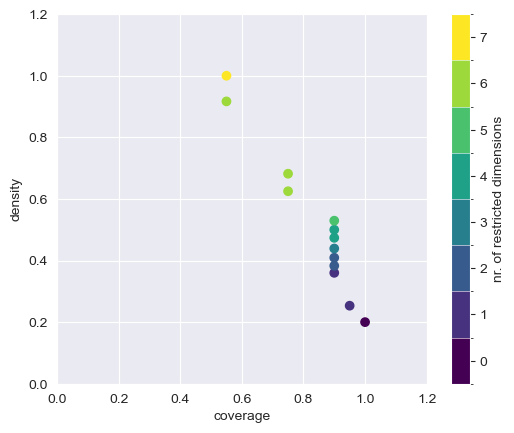

coverage     0.55
density      1.00
id          12.00
k           11.00
mass         0.11
mean         1.00
n           11.00
res_dim      7.00
Name: 12, dtype: float64

                              box 12                                 
                                 min          max  qp value  qp value
A.0_ID flood wave shape          0.0        123.0       NaN  1.000000
discount rate 1                {1.5}        {1.5}  0.000050       NaN
A.3_Brate                {10.0, 1.0}  {10.0, 1.0}  0.021680       NaN
A.5_Bmax                   53.823088   348.753509  0.383995       NaN
A.3_Bmax                   52.141148   320.341471  1.000000  0.159200
A.3_pfail                   0.015929     0.907635  1.000000  0.383995
A.2_pfail                   0.069469     0.934788  1.000000  1.000000



/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '{1.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

In [9]:
#PRIM SCENARIO 1: hoge schade in tijdstap 0
damage = outcomes["Expected Annual Damage"][:,1]

threshold = pd.Series(damage).quantile(0.8)
y_high_damage = damage > threshold

# Run PRIM
prim_alg_high = prim.Prim(experiments, y_high_damage, threshold=0.75)
box_high = prim_alg_high.find_box()

#Plot
box_high.show_tradeoff()
plt.show()

box_high.inspect()

#### Eerst even distributie van outcomes checken om een duidelijke treshold te bepalen


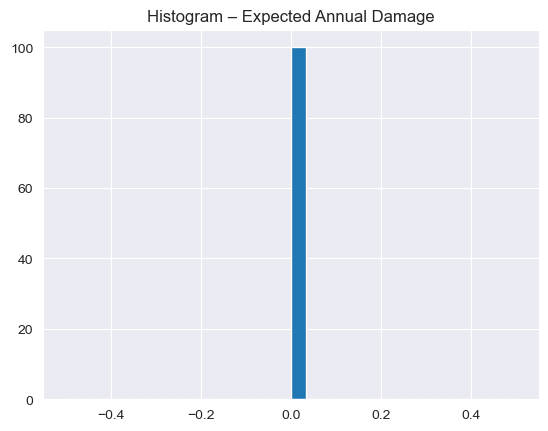

In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
damage = outcomes["RfR Total Costs"]    # 1-D (PF0–2) or 2-D (PF4)
data = damage if damage.ndim == 1 else damage[:, 1]   # pick t1
pd.Series(data).hist(bins=30)
plt.title("Histogram – Expected Annual Damage"); plt.show()


In [11]:
#### Eerst even distributie van outcomes checken om een duidelijke treshold te bepalen

import numpy as np, pandas as pd, matplotlib.pyplot as plt

HRI = outcomes["Hydrological Resilience Index"]  # 1-D (PF0–2) or 2-D (PF4)
data = HRI if HRI.ndim == 1 else HRI[0]  # pick t1
pd.Series(data).hist(bins=30)
plt.title("Histogram – Hydrological Resilience Index");
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (6, 3) instead

In [12]:
outcomes.keys()

dict_keys(['Hydrological Resilience Index', 'Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [13]:
HRI = outcomes["Hydrological Resilience Index"]   # vector or matrix

# if ndim==1  → just HRI
# else (ndim==2) → use HRI[:, 0]
data = HRI if HRI.ndim == 1 else HRI[:, 0]

pd.Series(data).hist(bins=30)
plt.title("Histogram – Hydrological Resilience Index")
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (100, 3) instead

In [31]:
model, _ = get_model_for_problem_formulation(4)
exp, out = perform_experiments(
    model,
    scenarios=1000,
    policies=[Policy("baseline", **get_do_nothing_dict())]  # minimal run
)


INFO | performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
100%|██████████████████████████████████████| 1000/1000 [03:23<00:00,  4.90it/s]
INFO | experiments finished


In [15]:
print("HRI key in outcomes:", [k for k in out.keys() if "Hydrological" in k])
print("Shape =", out["Hydrological Resilience Index"].shape)

HRI key in outcomes: ['Hydrological Resilience Index']
Shape = (1, 6, 3)


In [17]:
print("damage key in outcomes:", [k for k in out.keys() if "Damage" in k])
print("Shape =", out["Expected Annual Damage"].shape)

damage key in outcomes: ['Expected Annual Damage']
Shape = (1, 3)


In [18]:
print([k for k in out if "Damage" in k])


['Expected Annual Damage']


In [19]:
cols_unc           = [c for c in experiments.columns if "_Bmax" in c or "_Brate" in c]


In [32]:
cols_unc = [u.name for u in model.uncertainties]     # ← alle 19 onzekerheden
X = experiments[cols_unc]

In [39]:
# ---- 2.1 Hydrological Resilience Index ----
hri_sys = out["Hydrological Resilience Index"][:, -1, :].mean(axis=1)  # (N,) systeembreed
target_hri = hri_sys < 0
print(target_hri)

# ---- 2.2 Expected Annual Damage ----
ead_total = out["Expected Annual Damage"].sum(axis=1)      # (N,)
ead_q75   = np.percentile(ead_total, 75)
target_ead = ead_total >= ead_q75
print(target_ead)

# ---- 2.3 RfR Total Costs ----
rfr_costs = out["RfR Total Costs"].sum(axis=1)               # (N,)
rfr_q75   = np.percentile(rfr_costs, 75)
target_rfr = rfr_costs >= rfr_q75
print(target_rfr)

# ---- 2.4 Combineer tot één worst-case target ----
# y = target_hri | target_ead | target_rfr        # booleaanse vector (N,)
# print(f"worst-cases: {y.sum()} van 1000 runs  ({y.mean()*100:.1f} %)")

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [42]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,24,47.131350,1.5,0.614953,164.076969,1.5,0.947611,230.263563,10.0,0.830613,...,0,0,0,0,0,0,0,103,baseline,dikesnet
1,91,52.540085,1.0,0.187830,94.257014,1.0,0.095973,296.381174,10.0,0.395170,...,0,0,0,0,0,0,0,104,baseline,dikesnet
2,14,330.445222,1.0,0.590095,146.747804,1.0,0.704055,340.481383,10.0,0.562102,...,0,0,0,0,0,0,0,105,baseline,dikesnet
3,112,232.117342,1.5,0.458499,63.055955,10.0,0.564303,194.016660,1.5,0.779622,...,0,0,0,0,0,0,0,106,baseline,dikesnet
4,23,134.682247,1.0,0.157211,159.724041,1.5,0.194383,94.682603,10.0,0.624535,...,0,0,0,0,0,0,0,107,baseline,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,127,250.303018,1.5,0.775729,209.547556,10.0,0.442386,221.254415,1.0,0.363339,...,0,0,0,0,0,0,0,198,baseline,dikesnet
96,12,272.485615,1.5,0.821330,164.805033,1.0,0.540934,92.439233,1.5,0.329308,...,0,0,0,0,0,0,0,199,baseline,dikesnet
97,10,239.828775,10.0,0.932275,225.966179,1.0,0.728362,268.569679,1.0,0.083050,...,0,0,0,0,0,0,0,200,baseline,dikesnet
98,48,298.788975,10.0,0.711573,141.201381,10.0,0.802429,256.273035,1.5,0.975904,...,0,0,0,0,0,0,0,201,baseline,dikesnet


In [61]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(4)
    scenarios=100
    policies=4
    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=scenarios, policies=policies )

        experiments, outcomes = results

        print(experiments)

        # ---- 2.1 Hydrological Resilience Index ----
        hri_sys = outcomes["Hydrological Resilience Index"][:, -1, :].mean(axis=1)  # (N,) systeembreed
        target_hri = hri_sys < 0

        # ---- 2.2 Expected Annual Damage ----
        ead_total = outcomes["Expected Annual Damage"].sum(axis=1)  # (N,)
        ead_q75 = np.percentile(ead_total, 75)
        target_ead = ead_total >= ead_q75

        # ---- 2.3 RfR Total Costs ----
        rfr_costs = outcomes["RfR Total Costs"].sum(axis=1)  # (N,)
        rfr_q75 = np.percentile(rfr_costs, 75)
        target_rfr = rfr_costs >= rfr_q75

        # ---- 2.4 Combineer tot één worst-case target ----
        y = target_hri | target_ead | target_rfr        # booleaanse vector (N,)
        print(f"worst-cases: {y.sum()} van {scenarios*policies} runs  ({y.mean()*100:.1f} %)")

        #Determine model uncertainties
        cols_unc = [u.name for u in model.uncertainties]
        X = experiments[cols_unc]

        #Start PRIM
        prim_alg = prim.Prim(
            X, y,
            threshold=0.6,
            peel_alpha=0.1,
            mass_min=0.05
        )

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 4 policies * 1 model(s) = 400 experiments
100%|████████████████████████████████████████| 400/400 [00:17<00:00, 22.57it/s]
INFO | experiments finished
INFO | terminating pool


     A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax  \
0                         24  232.677210       1.0   0.906161  211.069891   
1                         15  290.642261      10.0   0.048939  282.618925   
2                         31  218.598386       1.0   0.242573  206.148319   
3                        120   81.529913       1.5   0.132030  112.112503   
4                          1  341.992603       1.5   0.010604   45.570749   
..                       ...         ...       ...        ...         ...   
395                       78  262.158724      10.0   0.921238  321.849547   
396                       89  203.689629      10.0   0.118386  245.321674   
397                      113  106.032228      10.0   0.364963   37.924218   
398                       49  168.661246       1.0   0.398034  124.024453   
399                      117  271.817816       1.5   0.141905  306.027717   

    A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...  \
0        

In [45]:
print(prim_alg.boxes)

[        discount rate 0       discount rate 1       discount rate 2  \
0  {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}   
1  {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}   

   A.0_ID flood wave shape    A.1_Bmax  A.1_pfail         A.1_Brate  \
0                        0   30.907308   0.007226  {1.0, 10.0, 1.5}   
1                      132  349.839460   0.997775  {1.0, 10.0, 1.5}   

     A.2_Bmax  A.2_pfail         A.2_Brate    A.3_Bmax  A.3_pfail  \
0   30.460824   0.002882  {1.0, 10.0, 1.5}   30.607854   0.009773   
1  349.388971   0.990172  {1.0, 10.0, 1.5}  348.561265   0.995982   

          A.3_Brate    A.4_Bmax  A.4_pfail         A.4_Brate    A.5_Bmax  \
0  {1.5, 10.0, 1.0}   31.913254   0.002592  {1.0, 10.0, 1.5}   32.744605   
1  {1.5, 10.0, 1.0}  348.662492   0.994593  {1.0, 10.0, 1.5}  348.162916   

   A.5_pfail         A.5_Brate  
0   0.004209  {1.5, 10.0, 1.0}  
1   0.990257  {1.5, 10.0, 1.0}  ]


In [46]:
print("type prim_alg.boxes:", type(prim_alg.boxes))

# toon eerste element
if len(prim_alg.boxes) > 0:
    first = prim_alg.boxes[0]
    print("\nEerste element:", first)
    print("type eerste element:", type(first))

    # als het een dict is → print sleutels
    if isinstance(first, dict):
        print("dict-keys:", list(first.keys()))

    # als het een object is → print attributen
    else:
        print("dir:", [a for a in dir(first) if not a.startswith('_')])

type prim_alg.boxes: <class 'list'>

Eerste element:         discount rate 0       discount rate 1       discount rate 2  \
0  {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}   
1  {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}   

   A.0_ID flood wave shape    A.1_Bmax  A.1_pfail         A.1_Brate  \
0                        0   30.907308   0.007226  {1.0, 10.0, 1.5}   
1                      132  349.839460   0.997775  {1.0, 10.0, 1.5}   

     A.2_Bmax  A.2_pfail         A.2_Brate    A.3_Bmax  A.3_pfail  \
0   30.460824   0.002882  {1.0, 10.0, 1.5}   30.607854   0.009773   
1  349.388971   0.990172  {1.0, 10.0, 1.5}  348.561265   0.995982   

          A.3_Brate    A.4_Bmax  A.4_pfail         A.4_Brate    A.5_Bmax  \
0  {1.5, 10.0, 1.0}   31.913254   0.002592  {1.0, 10.0, 1.5}   32.744605   
1  {1.5, 10.0, 1.0}  348.662492   0.994593  {1.0, 10.0, 1.5}  348.162916   

   A.5_pfail         A.5_Brate  
0   0.004209  {1.5, 10.0, 1.0}  
1   0.990257  {1

In [53]:
# alle boxen langs
for i, df in enumerate(prim_alg.boxes):
    dims = list(df.columns)                    # afgesneden variabelen
    # cov  = prim_alg.coverages[i]              # coverage-waarde
    # dens = prim_alg.densities[i]              # density-waarde

    veluwe = any("A.2_" in d for d in dims)
    print(f"box {i:2}   "
          f"dims={len(dims):<2}  veluwe={veluwe}")

box  0   dims=19  veluwe=True


TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


INFO | 400 points remaining, containing 190 cases of interest
INFO | mean: 0.75, mass: 0.09, coverage: 0.14210526315789473, density: 0.75 restricted_dimensions: 12


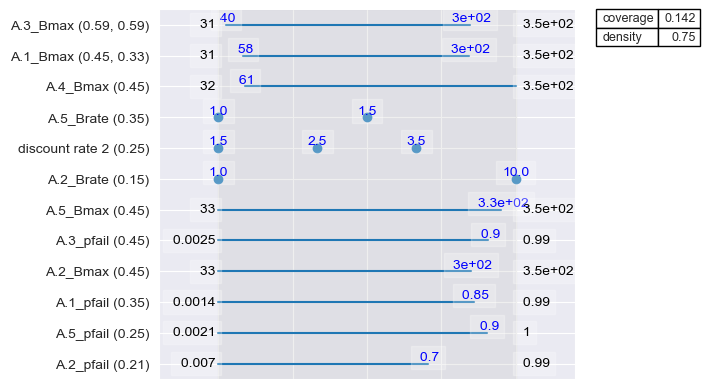

In [62]:
box = prim_alg.find_box()
box.inspect(style='graph')
plt.show()

In [3]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(5)
    scenarios=100
    policies=4
    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=scenarios, policies=policies )

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 4 policies * 1 model(s) = 400 experiments
100%|████████████████████████████████████████| 400/400 [00:18<00:00, 21.39it/s]
INFO | experiments finished
INFO | terminating pool


In [4]:
experiments, outcomes = results

In [5]:
for k, v in outcomes.items():
    print(f"{k:<35} shape={v.shape}  dtype={v.dtype}")

A.1_Expected Annual Damage          shape=(400, 3)  dtype=float64
A.1_Dike Investment Costs           shape=(400, 3)  dtype=float64
A.1_Expected Number of Deaths       shape=(400, 3)  dtype=float64
A.1_Hydrological Resilience Index   shape=(400, 3)  dtype=float64
A.2_Expected Annual Damage          shape=(400, 3)  dtype=float64
A.2_Dike Investment Costs           shape=(400, 3)  dtype=float64
A.2_Expected Number of Deaths       shape=(400, 3)  dtype=float64
A.2_Hydrological Resilience Index   shape=(400, 3)  dtype=float64
A.3_Expected Annual Damage          shape=(400, 3)  dtype=float64
A.3_Dike Investment Costs           shape=(400, 3)  dtype=float64
A.3_Expected Number of Deaths       shape=(400, 3)  dtype=float64
A.3_Hydrological Resilience Index   shape=(400, 3)  dtype=float64
A.4_Expected Annual Damage          shape=(400, 3)  dtype=float64
A.4_Dike Investment Costs           shape=(400, 3)  dtype=float64
A.4_Expected Number of Deaths       shape=(400, 3)  dtype=float64
A.4_Hydrol

In [12]:
hri_sys = outcomes["A.2_Hydrological Resilience Index"].mean(axis=1)  # (N,) systeembreed


array([0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666667,
       0.98666667, 0.98666667, 0.98666667, 0.98666667, 0.98666

In [15]:
hri_q25 = np.percentile(hri_sys, 25)# (N,) systeembreed
target_hri = hri_sys <= hri_q25
target_hri

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

INFO | 400 points remaining, containing 182 cases of interest
INFO | mean: 0.75, mass: 0.07, coverage: 0.11538461538461539, density: 0.75 restricted_dimensions: 4


worst-cases: 182 van 400 runs  (45.5 %)


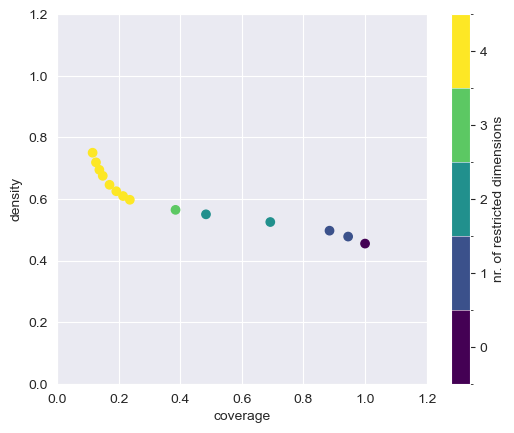

coverage     0.115385
density      0.750000
id          13.000000
k           21.000000
mass         0.070000
mean         0.750000
n           28.000000
res_dim      4.000000
Name: 13, dtype: float64

                          box 13                                     
                             min              max  qp value  qp value
A.2_pfail               0.000765         0.184701       NaN  0.015019
discount rate 1  {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  0.290024       NaN
discount rate 0       {1.5, 2.5}       {1.5, 2.5}  0.341061       NaN
A.4_Brate             {1.5, 1.0}       {1.5, 1.0}  0.599743       NaN



/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '{1.5, 3.5, 4.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


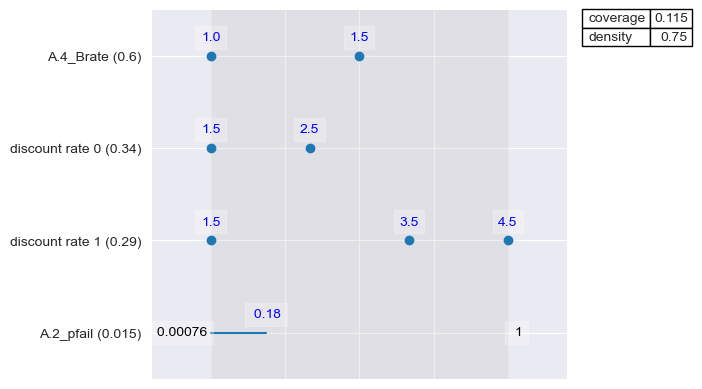

In [35]:
# ---- 2.1 Hydrological Resilience Index ----
hri_sys = outcomes["A.2_Hydrological Resilience Index"].mean(axis=1)
hri_q25 = np.percentile(hri_sys, 25)# (N,) systeembreed
target_hri = hri_sys <= hri_q25

        # ---- 2.2 Expected Annual Damage ----
ead_total = outcomes["A.2_Expected Annual Damage"].sum(axis=1)  # (N,)
ead_q75 = np.percentile(ead_total, 75)
target_ead = ead_total >= ead_q75

        # # ---- 2.3 RfR Total Costs ----
        # rfr_costs = outcomes["RfR Total Costs"].sum(axis=1)  # (N,)
        # rfr_q75 = np.percentile(rfr_costs, 75)
        # target_rfr = rfr_costs >= rfr_q75

        # ---- 2.4 Combineer tot één worst-case target ----
y = target_hri | target_ead        # booleaanse vector (N,)
print(f"worst-cases: {y.sum()} van {scenarios*policies} runs  ({y.mean()*100:.1f} %)")

        #Determine model uncertainties
cols_unc = [u.name for u in model.uncertainties]
X = experiments[cols_unc]

        #Start PRIM
prim_alg = prim.Prim(
    X, y,
    threshold=0.50,
    peel_alpha=0.1,
    mass_min=0.05
        )

box = prim_alg.find_box()

box.show_tradeoff()
plt.show()

box.inspect()

box.inspect(style='graph')
plt.show()









In [27]:
print(box)

In [28]:
df=box.to_dataframe()

AttributeError: 

In [38]:
box = prim_alg.find_box()
box.inspect()

#names  = box.box_lim_names         # lijst variabelen
limits = box.box_lims              # array (n, 2)
#
# df = pd.DataFrame(limits, index=names, columns=['min', 'max'])
# print(df.head())

INFO | 192 points remaining, containing 70 cases of interest
INFO | mean: 0.5, mass: 0.18, coverage: 0.1978021978021978, density: 0.5 restricted_dimensions: 4


coverage     0.197802
density      0.500000
id           8.000000
k           36.000000
mass         0.180000
mean         0.500000
n           72.000000
res_dim      4.000000
Name: 8, dtype: float64

               box 8                                
                 min         max  qp value  qp value
A.2_pfail   0.000765    0.710907       NaN  0.032689
A.4_pfail   0.001707    0.870845       NaN  0.378942
A.1_pfail   0.158903    0.999694  0.378942       NaN
A.1_Bmax   51.496224  348.961468  0.466115       NaN



In [39]:
box = prim_alg.find_box()          # of prim_alg.boxes[ID]

print("TYPE:", type(box), "\n")
print("---- Public attributes in this PrimBox ----")
for attr in dir(box):
    if not attr.startswith("_"):
        try:
            val = getattr(box, attr)
            print(f"{attr:<25}", type(val),
                  ("len="+str(len(val)) if hasattr(val, "__len__") else ""))
        except Exception as e:
            print(f"{attr:<25}", "<error reading>")

INFO | 120 points remaining, containing 34 cases of interest
INFO | box mean (0.375) does not meet threshold criteria (1 0.5),returning dump box


TYPE: <class 'ema_workbench.analysis.prim.PrimBox'> 

---- Public attributes in this PrimBox ----
box_lims                  <class 'list'> len=1
boxes_nominal             <class 'pandas.core.frame.DataFrame'> len=0
boxes_quantitative        <class 'pandas.core.frame.DataFrame'> len=0
coverage                  <class 'numpy.float64'> 
density                   <class 'numpy.float64'> 
drop_restriction          <class 'method'> 
inspect                   <class 'method'> 
inspect_tradeoff          <class 'method'> 
mass                      <class 'numpy.float64'> 
mean                      <class 'numpy.float64'> 
peeling_trajectory        <class 'pandas.core.frame.DataFrame'> len=1
prim                      <class 'ema_workbench.analysis.prim.Prim'> 
qp                        <class 'list'> len=1
res_dim                   <class 'numpy.int64'> 
resample                  <class 'method'> 
select                    <class 'method'> 
show_pairs_scatter        <class 'method'> 
show_ppt   

In [47]:
# 1. limits-lijst uitpakken
raw = box.box_lims[0]
#print(raw)# neem het enige element in de lijst

names = raw.columns                    # kolomnamen
mins  = raw.iloc[0].values             # rij 0
maxs  = raw.iloc[1].values             # rij 1

df = pd.DataFrame({'min': mins, 'max': maxs}, index=names)
print(df.head())

                                          min                   max
discount rate 0          {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}
discount rate 1          {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}
discount rate 2          {1.5, 2.5, 3.5, 4.5}  {1.5, 2.5, 3.5, 4.5}
A.0_ID flood wave shape                     1                   132
A.1_Bmax                            30.635151            348.961468


In [51]:
vars_= list(df.index)
sub = experiments[vars_].copy()
sub['y'] = prim_alg.yi.astype(bool)

sns.set_style("whitegrid")

g = sns.pairplot(
            data=sub,
            vars=vars_,
            hue='y',
            palette={False: "steelblue", True: "orange"},
            plot_kws=dict(s=15, edgecolor="none", alpha=0.6),
            diag_kws=dict(fill=False, common_norm=False)
        )

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

Error in callback <function flush_figures at 0x173957b00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [8]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(5)
    scenarios=100
    policies=4
    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=scenarios, policies=policies )

        experiments, outcomes = results

Process SpawnPoolWorker-1:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/multiprocessing/queues.py", line 386, in get
    with self._rlock:
  File "/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
  File "/Users/tessahuysinga/Downloads/anaconda3

KeyboardInterrupt: 

numeric : ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.2_Bmax', 'A.2_pfail', 'A.3_Bmax', 'A.3_pfail', 'A.4_Bmax', 'A.4_pfail', 'A.5_Bmax', 'A.5_pfail']
categor : ['discount rate 0', 'discount rate 1', 'discount rate 2', 'A.1_Brate', 'A.2_Brate', 'A.3_Brate', 'A.4_Brate', 'A.5_Brate']


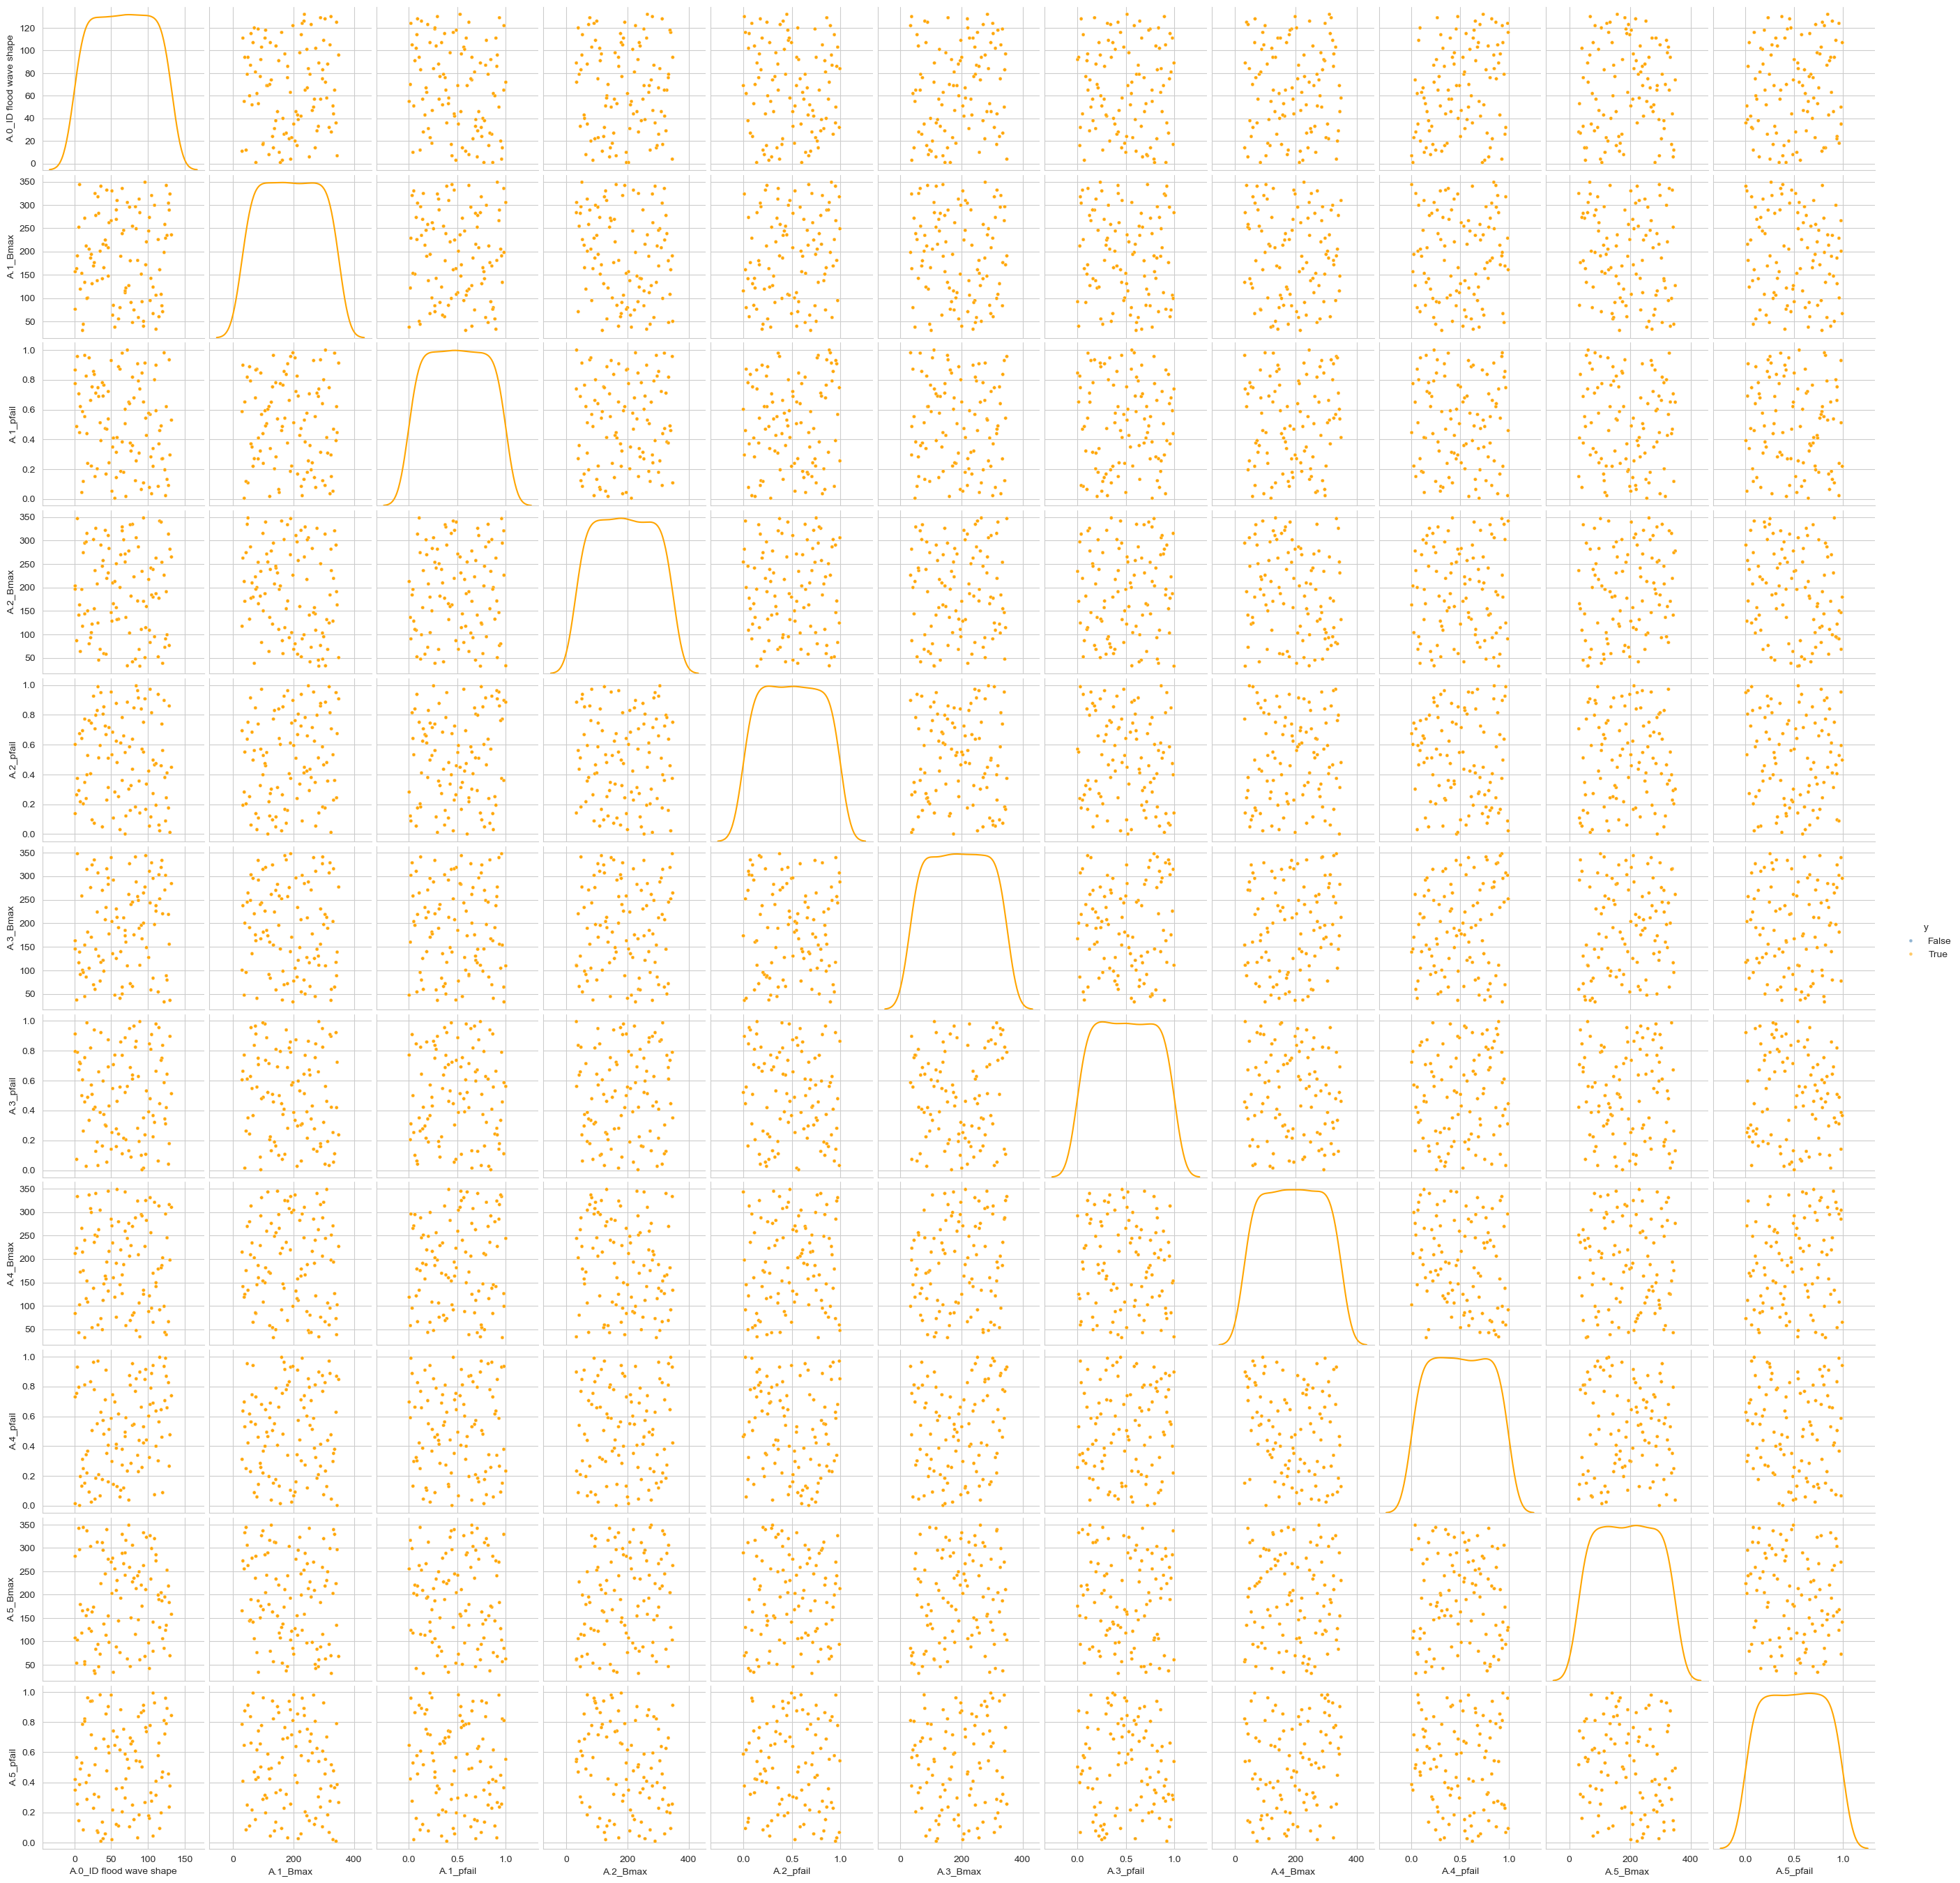

In [52]:
num_vars  = [v for v in vars_ if pd.api.types.is_numeric_dtype(experiments[v])]
cat_vars  = [v for v in vars_ if v not in num_vars]

print("numeric :", num_vars)
print("categor :", cat_vars)

# 2. DataFrame met alleen numerieke kolommen
sub = experiments[num_vars].copy()
sub['y'] = prim_alg.yi.astype(bool)          # booleans voor hue-kleur

# 3. pairplot op de numerieke variabelen
g = sns.pairplot(
        sub,
        vars=num_vars,
        hue='y',
        palette={False:"steelblue", True:"orange"},
        plot_kws=dict(s=12, alpha=0.6),
        diag_kws=dict(fill=False, common_norm=False)
    )

plt.show()

In [31]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(5)
    scenarios=100
    policies=4
    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=scenarios, policies=policies )

        experiments, outcomes = results

INFO | pool started with 7 workers
INFO | performing 100 scenarios * 4 policies * 1 model(s) = 400 experiments
100%|████████████████████████████████████████| 400/400 [00:18<00:00, 21.63it/s]
INFO | experiments finished
INFO | terminating pool


In [34]:
hri_sys = outcomes["A.2_Hydrological Resilience Index"].mean(axis=1)
hri_q25 = np.percentile(hri_sys, 25)# (N,) systeembreed
target_hri = hri_sys <= hri_q25

        # ---- 2.2 Expected Annual Damage ----
ead_total = outcomes["A.2_Expected Annual Damage"].sum(axis=1)  # (N,)
ead_q75 = np.percentile(ead_total, 75)
target_ead = ead_total >= ead_q75

        # # ---- 2.3 RfR Total Costs ----
        # rfr_costs = outcomes["RfR Total Costs"].sum(axis=1)  # (N,)
        # rfr_q75 = np.percentile(rfr_costs, 75)
        # target_rfr = rfr_costs >= rfr_q75

        # ---- 2.4 Combineer tot één worst-case target ----
y = target_hri | target_ead        # booleaanse vector (N,)
print(f"worst-cases: {y.sum()} van {scenarios*policies} runs  ({y.mean()*100:.1f} %)")

        #Determine model uncertainties
cols_unc = [u.name for u in model.uncertainties]
X = experiments[cols_unc]

#Start PRIM
prim_alg = prim.Prim(
            X, y,
            threshold=0.50,
            peel_alpha=0.1,
            mass_min=0.05
        )



worst-cases: 200 van 400 runs  (50.0 %)


INFO | 348 points remaining, containing 148 cases of interest
INFO | mean: 0.75, mass: 0.08, coverage: 0.12, density: 0.75 restricted_dimensions: 5


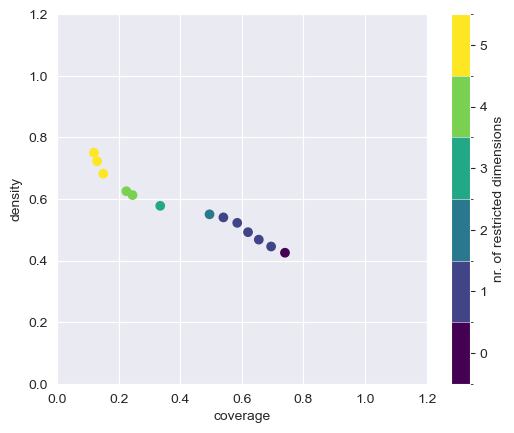

In [36]:
box = prim_alg.find_box()

box.show_tradeoff()
plt.show()

In [37]:
box_id = 4                  # bv. bolletje met goeie balans
box    = prim_alg.boxes[box_id]

IndexError: list index out of range